In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
mu_0, s_0 = 110.6, 24.8
mu_1, s_1 = 142.3, 29.6

mu_crit = 126

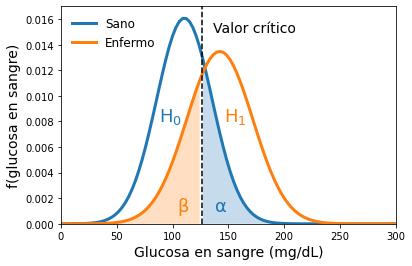

In [116]:
x = np.linspace(0, 300, 100)

plt.plot(x, norm.pdf(x, mu_0, s_0), '-', lw=3, label='Sano')
plt.plot(x, norm.pdf(x, mu_1, s_1), '-', lw=3, label='Enfermo')

plt.fill_between(x, norm.pdf(x, mu_0, s_0) , where = x > mu_crit, alpha = 0.25)
plt.fill_between(x, norm.pdf(x, mu_1, s_1) , where = x < mu_crit, alpha = 0.25)

plt.text(mu_crit + 10, 0.015, 'Valor crítico', fontsize = 14)
plt.text(88, 0.008, 'H$_0$', fontsize = 18, color = 'C0')
plt.text(146, 0.008, 'H$_1$', fontsize = 18, color = 'C1')
plt.text(138, 0.001, 'α', fontsize = 18, color = 'C0')
plt.text(104, 0.001, 'β', fontsize = 18, color = 'C1')

plt.xlim(0, 300)
plt.ylim(0, 0.017)
plt.axvline(mu_crit, linestyle = '--', color = 'k')
plt.xlabel('Glucosa en sangre (mg/dL)', fontsize = 14)
plt.ylabel('f(glucosa en sangre)', fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 12, frameon = False)
plt.show()

In [97]:
beta = norm.cdf(mu_crit, mu_1, s_1)
alfa = norm.sf(mu_crit, mu_0, s_0)

precision = (1 - alfa) * 100
falso_positivo = alfa * 100
falso_negativo = beta * 100

print(f'La precisión del test es de {precision:.1f} %')
print(f'La probabilidad de ser declarado enfermo estando sano es de {falso_positivo:.1f} %')
print(f'La probabilidad de ser declarado sano estando enfermo es de {falso_negativo:.1f} %')

La precisión del test es de 73.3 %
La probabilidad de ser declarado enfermo estando sano es de 26.7 %
La probabilidad de ser declarado sano estando enfermo es de 29.1 %


In [115]:
prev = 0.35 # prevalencia de la diabetes

prov_positivo = (1 - beta)*prev + alfa*(1 - prev)
prov_bayes = (1 - beta)*prev/prov_positivo

print(f'La probabilidad de que una persona con test positivo efectivamente tenga diabetes es de {prov_bayes*100:.1f} %')

La probabilidad de que una persona con test positivo efectivamente tenga diabetes es de 58.8 %
